In [1]:
import pybaseball as pb
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
#from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
thisYearPitches = pb.statcast(start_dt = '2023-03-29', end_dt = '2023-10-02')
#Using pybaseball, I downloaded all pitches thrown this season.

This is a large query, it may take a moment to complete


C:\Users\aveng\anaconda3\lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|██████████| 188/188 [01:32<00:00,  2.03it/s]


# Cleaning Data

### To clean the data, I edited batted ball information, such as launch angle, to make the result that produces the most hits be the highest number. This is done so that when the machine learning models are interpreting the data, they can easily see that the higher the number, the more likely the result is a hit.

In [3]:
thisYearBBE = thisYearPitches.loc[thisYearPitches['description'] == 'hit_into_play']
thisYearBBE = thisYearBBE.loc[thisYearBBE['events'] != 'catcher_interf']
#I kept all occurences of the ball being hit into play, not including catcher's interference because it doesn't produce batted ball data.

In [4]:
thisYearBBE = thisYearBBE.drop(['release_speed'], axis=1)
thisYearBBE = thisYearBBE.drop(['release_pos_x'], axis=1)
thisYearBBE = thisYearBBE.drop(['release_pos_z'], axis=1)
thisYearBBE = thisYearBBE.drop(['spin_dir'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fld_score'], axis=1) 
thisYearBBE = thisYearBBE.drop(['post_away_score'], axis=1) 
thisYearBBE = thisYearBBE.drop(['post_home_score'], axis=1) 
thisYearBBE = thisYearBBE.drop(['post_bat_score'], axis=1) 
thisYearBBE = thisYearBBE.drop(['post_fld_score'], axis=1) 
thisYearBBE = thisYearBBE.drop(['if_fielding_alignment'], axis=1) 
thisYearBBE = thisYearBBE.drop(['of_fielding_alignment'], axis=1) 
thisYearBBE = thisYearBBE.drop(['spin_axis'], axis=1) 
thisYearBBE = thisYearBBE.drop(['delta_home_win_exp'], axis=1) 
thisYearBBE = thisYearBBE.drop(['delta_run_exp'], axis=1)
thisYearBBE = thisYearBBE.drop(['spin_rate_deprecated'], axis=1) 
thisYearBBE = thisYearBBE.drop(['break_angle_deprecated'], axis=1) 
thisYearBBE = thisYearBBE.drop(['break_length_deprecated'], axis=1) 
thisYearBBE = thisYearBBE.drop(['des'], axis=1) 
thisYearBBE = thisYearBBE.drop(['woba_denom'], axis=1) 
thisYearBBE = thisYearBBE.drop(['babip_value'], axis=1) 
thisYearBBE = thisYearBBE.drop(['iso_value'], axis=1)
thisYearBBE = thisYearBBE.drop(['at_bat_number'], axis=1) 
thisYearBBE = thisYearBBE.drop(['pitch_number'], axis=1) 
thisYearBBE = thisYearBBE.drop(['home_score'], axis=1) 
thisYearBBE = thisYearBBE.drop(['away_score'], axis=1) 
thisYearBBE = thisYearBBE.drop(['bat_score'], axis=1)
thisYearBBE = thisYearBBE.drop(['fielder_2'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fielder_3'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fielder_4'], axis=1)
thisYearBBE = thisYearBBE.drop(['fielder_5'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fielder_6'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fielder_7'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fielder_8'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fielder_9'], axis=1) 
thisYearBBE = thisYearBBE.drop(['release_pos_y'], axis=1)
thisYearBBE = thisYearBBE.drop(['estimated_woba_using_speedangle'], axis=1) 
thisYearBBE = thisYearBBE.drop(['woba_value'], axis=1) 
thisYearBBE = thisYearBBE.drop(['type'], axis=1) 
thisYearBBE = thisYearBBE.drop(['hit_location'], axis=1) 
thisYearBBE = thisYearBBE.drop(['bb_type'], axis=1) 
thisYearBBE = thisYearBBE.drop(['balls'], axis=1) 
thisYearBBE = thisYearBBE.drop(['strikes'], axis=1) 
thisYearBBE = thisYearBBE.drop(['hit_distance_sc'], axis=1) 
thisYearBBE = thisYearBBE.drop(['effective_speed'], axis=1) 
thisYearBBE = thisYearBBE.drop(['release_spin_rate'], axis=1) 
thisYearBBE = thisYearBBE.drop(['release_extension'], axis=1) 
thisYearBBE = thisYearBBE.drop(['game_pk'], axis=1) 
thisYearBBE = thisYearBBE.drop(['pitcher.1'], axis=1) 
thisYearBBE = thisYearBBE.drop(['fielder_2.1'], axis=1) 
thisYearBBE = thisYearBBE.drop(['game_year'], axis=1) 
thisYearBBE = thisYearBBE.drop(['pfx_x'], axis=1) 
thisYearBBE = thisYearBBE.drop(['pfx_z'], axis=1) 
thisYearBBE = thisYearBBE.drop(['plate_x'], axis=1) 
thisYearBBE = thisYearBBE.drop(['plate_z'], axis=1) 
thisYearBBE = thisYearBBE.drop(['vy0'], axis=1) 
thisYearBBE = thisYearBBE.drop(['vz0'], axis=1) 
thisYearBBE = thisYearBBE.drop(['ax'], axis=1) 
thisYearBBE = thisYearBBE.drop(['ay'], axis=1) 
thisYearBBE = thisYearBBE.drop(['az'], axis=1) 
thisYearBBE = thisYearBBE.drop(['sz_top'], axis=1) 
thisYearBBE = thisYearBBE.drop(['sz_bot'], axis=1) 
thisYearBBE = thisYearBBE.drop(['on_3b'], axis=1) 
thisYearBBE = thisYearBBE.drop(['on_2b'], axis=1) 
thisYearBBE = thisYearBBE.drop(['on_1b'], axis=1) 
thisYearBBE = thisYearBBE.drop(['outs_when_up'], axis=1) 
thisYearBBE = thisYearBBE.drop(['inning'], axis=1) 
thisYearBBE = thisYearBBE.drop(['hc_x'], axis=1) 
thisYearBBE = thisYearBBE.drop(['hc_y'], axis=1) 
thisYearBBE = thisYearBBE.drop(['tfs_deprecated'], axis=1) 
thisYearBBE = thisYearBBE.drop(['tfs_zulu_deprecated'], axis=1) 
thisYearBBE = thisYearBBE.drop(['umpire'], axis=1) 
thisYearBBE = thisYearBBE.drop(['sv_id'], axis=1) 
thisYearBBE = thisYearBBE.drop(['vx0'], axis=1) 
thisYearBBE = thisYearBBE.drop(['inning_topbot'], axis=1) 
thisYearBBE = thisYearBBE.drop(['game_type'], axis=1) 
thisYearBBE = thisYearBBE.drop(['stand'], axis=1) 
thisYearBBE = thisYearBBE.drop(['p_throws'], axis=1) 
thisYearBBE = thisYearBBE.drop(['home_team'], axis=1) 
thisYearBBE = thisYearBBE.drop(['away_team'], axis=1) 
#This drops all files not directly related with player association, batted ball information, or pitch type.

In [5]:
BBE = pd.DataFrame(thisYearBBE)

In [6]:
BBE = BBE.dropna(how = 'any')

In [7]:
BBE['events'] = BBE['events'].replace(['single'], 1)
BBE['events'] = BBE['events'].replace(['double'], 1)
BBE['events'] = BBE['events'].replace(['triple'], 1)
BBE['events'] = BBE['events'].replace(['home_run'], 1)
BBE['events'] = BBE['events'].replace(['field_out'], 0)
BBE['events'] = BBE['events'].replace(['field_error'], 0)
BBE['events'] = BBE['events'].replace(['grounded_into_double_play'], 0)
BBE['events'] = BBE['events'].replace(['force_out'], 0)
BBE['events'] = BBE['events'].replace(['sac_fly'], 0)
BBE['events'] = BBE['events'].replace(['sac_bunt'], 0)
BBE['events'] = BBE['events'].replace(['double_play'], 0)
BBE['events'] = BBE['events'].replace(['fielders_choice'], 0)
BBE['events'] = BBE['events'].replace(['fielders_choice_out'], 0)
BBE['events'] = BBE['events'].replace(['sac_fly_double_play'], 0)
BBE['events'] = BBE['events'].replace(['triple_play'], 0)
BBE['events'] = BBE['events'].replace(['sac_bunt_double_play'], 0)
BBE.events.value_counts()
#This changes all hits into a 1 and all outs in 0 so that machine learning models can properly train themselves.

0    83106
1    40753
Name: events, dtype: int64

In [8]:
BBE = BBE[['pitch_type', 'game_date', 'player_name', 'batter', 'pitcher', 'description', 'pitch_name', 'launch_speed', 'launch_angle', 'events', 'zone', 'launch_speed_angle', 'estimated_ba_using_speedangle']]

In [9]:
encoder = OneHotEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(BBE[['launch_speed_angle']]).toarray())
BBE = BBE.join(encoded_df)
#This creates 6 new columns that have information about how well a ball is hit, but as binary numbers.

In [10]:
BBE.columns = ['pitch_type', 'game_date', 'player_name', 'batter', 'pitcher', 'description', 'pitch_name', 'launch_speed', 'launch_angle', 'events', 'zone', 'launch_speed_angle', 'estimated_ba_using_speedangle', 'weak_contact', 'topped', 'under', 'flare', 'solid_contact', 'barreled']

In [11]:
BBE['launch_speed_angle'] = BBE['launch_speed_angle'].replace([1], 7)
BBE['launch_speed_angle'] = BBE['launch_speed_angle'].replace([3], 1)
BBE['launch_speed_angle'] = BBE['launch_speed_angle'].replace([7], 3)
BBE['launch_speed_angle'] = BBE['launch_speed_angle'].replace([4], 7)
BBE['launch_speed_angle'] = BBE['launch_speed_angle'].replace([5], 4)
BBE['launch_speed_angle'] = BBE['launch_speed_angle'].replace([7], 5)
#This reorders the column so that the outcomes that the numbers are sorted by their likeliness to produce a hit.

In [12]:
for x in range(60,91):
    if x in BBE['launch_angle'].unique():
        BBE['launch_angle'] = BBE['launch_angle'].replace([x], -90)
for x in range(50,60):
    if x in BBE['launch_angle'].unique():
        BBE['launch_angle'] = BBE['launch_angle'].replace([x], -85)
for x in range(40,50):
    if x in BBE['launch_angle'].unique():
        BBE['launch_angle'] = BBE['launch_angle'].replace([x], -75)
for x in range(38,40):
    if x in BBE['launch_angle'].unique():
        BBE['launch_angle'] = BBE['launch_angle'].replace([x], -50)
for x in range(14,38):
    if x in BBE['launch_angle'].unique():
        diff = x - 13
        place = 13 - diff
        BBE['launch_angle'] = BBE['launch_angle'].replace([x], place)
        
#This makes the launch angle with the best hit percentage, 13, be the highest number, and all numbers above are changed to negative numbers that produce similar hit results.

In [13]:
for x in range(1, 15):
    if x in BBE['zone'].unique():
        if x <= 9:
            BBE['zone'] = BBE['zone'].replace([x], 1)
        else:
            BBE['zone'] = BBE['zone'].replace([x], 0)
            
#This converts the zone column into whether or not the pitch was in the zone.

In [14]:
Download = BBE[['player_name', 'batter', 'pitcher', 'launch_speed', 'launch_angle', 'launch_speed_angle', 'zone', 'events']]
#Download.to_csv('C:/Users/aveng/Downloads/2023AdjustedRegularSeasonBBE.csv')
#This is how I downloaded the edited data to use in the shiny program.

# Testing Data

### To test the data, I used different combinations of features across 3 different machine learning algorithms to see which combination of the two produced the most accurate results. Logistic regression achieved almost an 80% accuracy, up from just above 60% on unedited data on my first attempt, while extra trees and random forest were mostly around 76%. 

In [15]:
#scale = BBE[['launch_speed', 'launch_angle', 'launch_speed_angle', 'zone', 'weak_contact', 'topped', 'under', 'flare', 'solid_contact', 'barreled']]
scale = BBE[['launch_speed', 'launch_angle', 'launch_speed_angle', 'zone']]
#cols = BBE[['launch_speed', 'launch_angle', 'launch_speed_angle', 'weak_contact', 'topped', 'under', 'flare', 'solid_contact', 'barreled']]

#Here I tested out different combinations of features to see which brought the best results.

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scale)
scaled_BBE = pd.DataFrame(scaled_data, columns = scale.columns)

In [17]:
X = scaled_BBE
y = BBE['events']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=5)
#I used sklearn's train test split model to easily test different machine learning models.

In [19]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train);
y_pred = lr.predict(X_test)
print(round(accuracy_score(y_test, y_pred)*100,5), "%")

#This is the model I ended up using because it produced the most accurate results.

78.71387 %


In [20]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight = 'balanced'))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
#This is the same model as the one above, the output is just in a different format.

0.7871387049895043

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13235,  3359],
       [ 1914,  6264]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

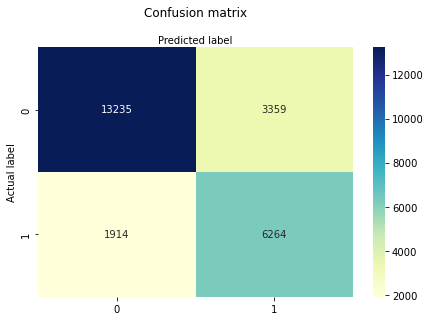

In [22]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#This prints the confusion matrix made above to see where correct and incorrect predictions occur.

In [23]:
target_names = ['out', 'hit']
print(classification_report(y_test, y_pred, target_names=target_names))
#Here we see the accuracy of each outcome. The algorithm predicts that an out will be a hit far more than any other error,
#this is where most improvements will likely be made.

              precision    recall  f1-score   support

         out       0.87      0.80      0.83     16594
         hit       0.65      0.77      0.70      8178

    accuracy                           0.79     24772
   macro avg       0.76      0.78      0.77     24772
weighted avg       0.80      0.79      0.79     24772



In [24]:
etf = ExtraTreesClassifier(n_estimators = 100)
etf.fit(X_train, y_train)
feature_importance = etf.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in etf.estimators_], axis = 0)
etf_pred = etf.predict(X_test)
print(round(accuracy_score(y_test, etf_pred)*100,5), "%")
#Testing the extra trees model.

75.85177 %


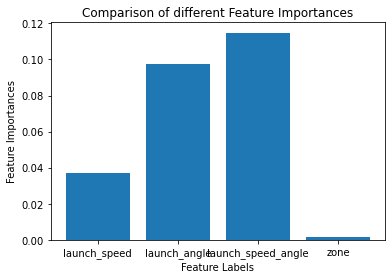

In [25]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()
#Seeing which features the extra tree models values the most.

In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_prediction = rf.predict(X_test)
print(round(accuracy_score(y_test, rf_prediction)*100,5), "%")
#Testing the random forest model.

75.95673 %


In [27]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf)
sfm.fit(X_train, y_train)
print(sfm.estimator_.feature_importances_)
#Seeing how much the random forest model values each feature.

[0.45573277 0.23356861 0.30180664 0.00889197]


In [29]:
BBE.corr()
#Viewing correlation between each feature.

,batter,pitcher,launch_speed,launch_angle,events,zone,launch_speed_angle,estimated_ba_using_speedangle,weak_contact,topped,under,flare,solid_contact,barreled
batter,1.000000,0.004468,-0.007483,0.006215,0.004644,0.006084,0.005706,0.002638,-0.008178,0.000796,-0.000573,-0.000520,0.004718,0.002969
pitcher,0.004468,1.000000,0.010397,-0.000719,0.003068,0.017442,0.001681,-0.002064,-0.003542,-0.002247,0.003605,0.001312,-0.001030,-0.000277
launch_speed,-0.007483,0.010397,1.000000,0.324283,0.254781,0.290118,0.366079,0.395952,-0.001578,0.000400,0.004311,-0.004053,-0.000970,0.000842
launch_angle,0.006215,-0.000719,0.324283,1.000000,0.396281,0.016533,0.601183,0.626811,-0.003064,-0.003208,-0.000952,0.002623,0.001577,0.004120
events,0.004644,0.003068,0.254781,0.396281,1.000000,0.052747,0.549575,0.634545,-0.004496,0.000001,-0.001134,-0.000007,0.000353,0.005206
zone,0.006084,0.017442,0.290118,0.016533,0.052747,1.000000,0.073437,0.082205,0.001381,-0.001872,-0.000925,0.002771,-0.001858,0.000838
launch_speed_angle,0.005706,0.001681,0.366079,0.601183,0.549575,0.073437,1.000000,0.864685,-0.002291,-0.000478,-0.002534,-0.000874,0.002775,0.005840
estimated_ba_using_speedangle,0.002638,-0.002064,0.395952,0.626811,0.634545,0.082205,0.864685,1.000000,-0.000985,0.000763,-0.000911,-0.003082,0.001776,0.004338
weak_contact,-0.008178,-0.003542,-0.001578,-0.003064,-0.004496,0.001381,-0.002291,-0.000985,1.000000,-0.157967,-0.133885,-0.127911,-0.055524,-0.066299
topped,0.000796,-0.002247,0.000400,-0.003208,0.000001,-0.001872,-0.000478,0.000763,-0.157967,1.000000,-0.404723,-0.386664,-0.167843,-0.200415


<AxesSubplot:>

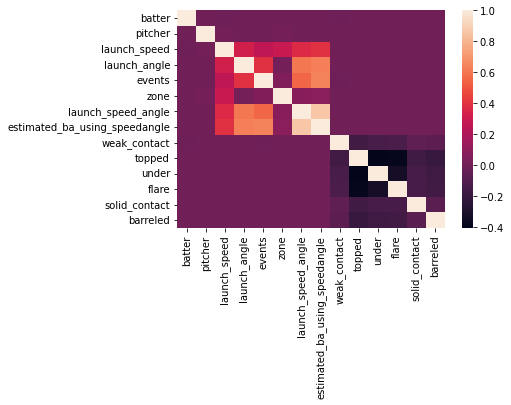

In [30]:
sns.heatmap(BBE.corr())
#A heatmap of the correlation.